# Семинар 8. Разведочный анализ данных<br/>Анализ клиентской базы ОТП-банка

# Введение

Этот набор был подготовлен для конкурса по решению прикладной задачи предсказания отклика клиентов на маркетинговую кампанию в рамках всероссийской конференции «Математические методы распознавания образов» ММРО-15 (2011). Описание и результаты конкурса  размещены на ресурсе www.machinelearning.ru в разделе "Конкурсы".

Данные предоставлены ОТП Банком (www.otpbank.ru), который входит в число 50 крупнейших банков России, занимает 2-е место на рынке потребительского кредитования, 3-е место на рынке беззалогового кредитования, и 4-е место на рынке кредитных карт.

## Постановка задачи
Один из способов повышения эффективности взаимодействия банка с клиентами заключается в том, чтобы отправлять предложение о новой услуге не всем клиентам банка, а только некоторой части, выбираемой по принципу наибольшей склонности к отклику на данное предложение.

В этом задании вам предстоит выполнить разведочный анализ данных о клиентах банка с целью выявления факторов, влияющих на отклик.

## Описание данных

Исходная выборка («выборка А») содержит записи о 15 223 клиентов, классифицированных на два класса:
1 — отклик был (1812 клиентов),
0 — отклика не было (13411 клиентов).

Данные находятся в файле: `otp_bank.xlsx`, описание переменных доступно на втором листе, который мы загрузим в таблицу `fields`.


# 1. Подготовка данных к анализу


## Загрузка и изучение структуры данных

In [1]:
# Загрузка пакетов
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
otp = pd.read_excel('../datasets/otp_bank.xlsx')
otp.head()

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,education,marital_status,...,reg_phone_fl,gen_phone_fl,loan_num_total,loan_num_closed,loan_num_paym,loan_dlq_num,loan_max_dlq,loan_avg_dlq_amt,loan_max_dlq_amt,previous_card_num_utilized
0,59910150,0,49,работает,не пенсионер,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580.000000,1580.0,0.0
1,59910230,0,32,работает,не пенсионер,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020.000000,4020.0,NaN
2,59910525,0,52,работает,не пенсионер,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0.000000,0.0,NaN
3,59910803,0,39,работает,не пенсионер,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,1589.923333,1590.0,NaN
4,59911781,0,30,работает,не пенсионер,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,1152.150000,2230.0,NaN


Расшифровка названий полей содержится в таблице `fields`:

In [3]:
fields = pd.read_excel('../datasets/otp_bank.xlsx', sheet_name=1)
fields

,name,description
0,agreement_rk,уникальный идентификатор объекта в выборке
1,target,целевая переменная:отклик на маркетинговую кам...
2,age,возраст клиента
3,socstatus_work_fl,социальный статус клиента относительно работы ...
4,socstatus_pens_fl,социальный статус клиента относительно пенсии ...
5,gender,пол клиента
6,child_total,количество детей клиента
7,dependants,количество иждивенцев клиента
8,education,образование
9,marital_status,семейное положение


После загрузки необходимо изучить структуру данных, диапазоны изменения всех величин, наличие пропусков, аномальных значений.

In [4]:
otp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   agreement_rk                15223 non-null  int64  
 1   target                      15223 non-null  int64  
 2   age                         15223 non-null  int64  
 3   socstatus_work_fl           15223 non-null  object 
 4   socstatus_pens_fl           15223 non-null  object 
 5   gender                      15223 non-null  int64  
 6   child_total                 15223 non-null  int64  
 7   dependants                  15223 non-null  int64  
 8   education                   15223 non-null  object 
 9   marital_status              15223 non-null  object 
 10  gen_industry                13856 non-null  object 
 11  gen_title                   13856 non-null  object 
 12  org_tp_state                13856 non-null  object 
 13  org_tp_fcapital             138

In [5]:
otp.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
agreement_rk,15223.0,65401831.0,4568181.0,59910150.0,61920915.0,64370996.0,67088018.0,75292242.0
target,15223.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
age,15223.0,40.0,12.0,21.0,30.0,39.0,50.0,67.0
gender,15223.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
child_total,15223.0,1.0,1.0,0.0,0.0,1.0,2.0,10.0
dependants,15223.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0
personal_income,15223.0,13854.0,9015.0,24.0,8000.0,12000.0,17000.0,250000.0
reg_fact_fl,15223.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
fact_post_fl,15223.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
reg_post_fl,15223.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


В полях таблицы есть столбцы с пропусками и аномальными значениями. Например, вот что происходит в столбце со сроком проживания по текущему месту жительства в месяцах:

<AxesSubplot:>

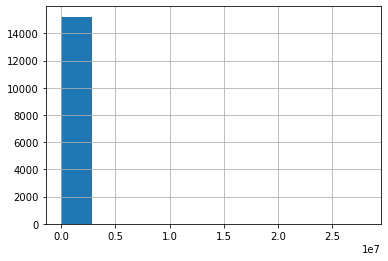

In [6]:
otp['fact_living_term'].hist()

Такие значения - следствия ошибок при вводе данных, поэтому необходимо избавиться от них - отфильтровав данные, если их не много, или заменив на пустые или типичные значения.

In [7]:
otp.query('fact_living_term > 12 * 60')

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,education,marital_status,...,reg_phone_fl,gen_phone_fl,loan_num_total,loan_num_closed,loan_num_paym,loan_dlq_num,loan_max_dlq,loan_avg_dlq_amt,loan_max_dlq_amt,previous_card_num_utilized
988,60383012,0,51,работает,не пенсионер,0,0,0,Среднее специальное,Состою в браке,...,0,1,1,0,6,0,0,0.0,0.0,NaN
1420,60527782,0,60,работает,пенсионер,1,0,0,Среднее,Вдовец/Вдова,...,0,1,1,1,3,0,0,0.0,0.0,NaN
2071,61154776,0,41,работает,не пенсионер,1,3,3,Среднее,Состою в браке,...,0,1,1,0,6,1,1,450.0,450.0,NaN
5369,62438740,0,51,работает,не пенсионер,1,0,0,Среднее,Не состоял в браке,...,0,1,1,0,4,0,0,0.0,0.0,NaN
5681,62590265,0,31,работает,не пенсионер,1,0,0,Среднее специальное,Не состоял в браке,...,0,1,1,0,4,1,1,2980.0,2980.0,NaN
6186,62946995,0,49,работает,не пенсионер,1,0,0,Среднее специальное,Не состоял в браке,...,0,1,1,1,3,0,0,0.0,0.0,NaN
7650,64375368,0,61,работает,пенсионер,1,2,0,Неполное среднее,Состою в браке,...,0,1,1,1,4,0,0,0.0,0.0,NaN
7711,64426430,0,62,работает,пенсионер,1,1,0,Среднее,Состою в браке,...,0,1,1,0,3,0,0,0.0,0.0,NaN
8562,64903923,0,38,не работает,пенсионер,0,1,0,Среднее специальное,Разведен(а),...,0,0,1,0,3,0,0,0.0,0.0,NaN
9948,66589572,0,64,не работает,пенсионер,1,10,1,Среднее,Состою в браке,...,0,0,3,3,22,0,0,0.0,0.0,NaN


В этом наборе людей с некорректным сроком проживания не так много и записи можно удалить. Также можно заменить эти значения на пустое или типичное значение. Любой из вариантов имеет преимущества и недостатки.

<AxesSubplot:>

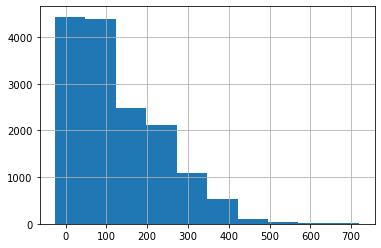

In [8]:
otp_clean = otp.copy()
otp_clean['fact_living_term'] = np.where(otp_clean['fact_living_term'] > (12 * 60), 
                                         np.nan, otp_clean['fact_living_term']) 

otp_clean['fact_living_term'].hist()

### Задача 1.1
Аналогичным образом удалите аномальные значения из поля `work_time`.

In [9]:
# Ваш код здесь

## Работа с пропущенными значениями

В поле с количеством предыдущих кредитных карт - `previous_card_num_utilized` много пропусков, которые обозначают, что у клиента до этого не было кредитных карт, выданных банком. Такие пропущенные значения можно заменить на нули. 

In [10]:
otp_clean['previous_card_num_utilized'].fillna(0, inplace=True)

In [11]:
otp_clean['previous_card_num_utilized'].isna().value_counts()

False    15223
Name: previous_card_num_utilized, dtype: int64

# 2. Портрет клиента


## Возраст

Возраст - это количественная величина.



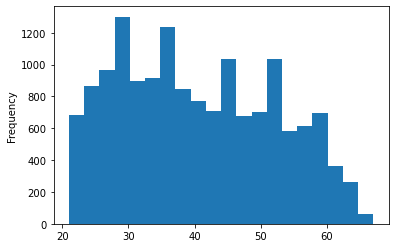

In [12]:
otp_clean['age'].plot(kind='hist', bins=20);

## Пол

Пол кодируется в данных двумя значениями - 0 и 1.


<AxesSubplot:>

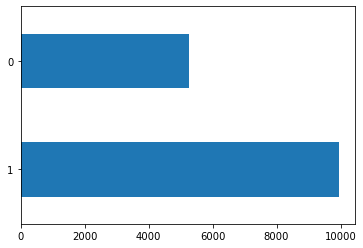

In [13]:
otp_clean['gender'].value_counts().plot(kind='barh')

Для более понятных визуализаций преобразуем тип переменной в категориальный:

In [14]:
otp_clean['genderf'] = otp_clean['gender'].astype('category')
otp_clean['genderf'].cat.categories=['м', 'ж']
otp_clean['genderf'].dtype

CategoricalDtype(categories=['м', 'ж'], ordered=False)

<AxesSubplot:>

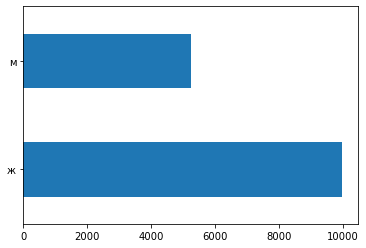

In [15]:
otp_clean['genderf'].value_counts().plot(kind='barh')

В больших наборах данных категориальные объекты часто используются как удобная возможность сэкономить память и повысить производительность.

### Задача 2.1
Аналогичным образом, создайте факторную переменную `targetf`, которая должна принимать значение `Отклик` (1), если клиент откликнулся на предложение и `Нет отклика` (0), если не откликнулся на предложение.

In [16]:
# Ваш код здесь

## Образование

Уровень образования - категориальная переменная. Для анализа ее распределения необходимо использовать столбиковую диаграмму с частотами или относительными частотами.

<AxesSubplot:>

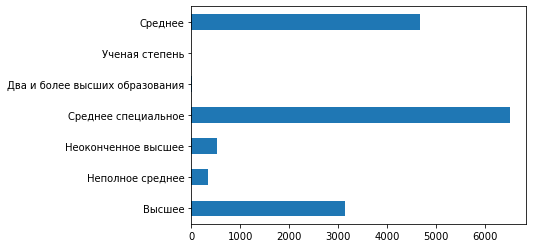

In [17]:
otp_clean['education'].value_counts(sort=False).plot(kind='barh')


Сейчас уровни образования идут в алфавитном порядке. Для облегчения интерпретации результатов необходимо придать категориям какой-либо логический порядок. Уровни этой переменной можно рассматривать как упорядоченные (от самого низкого, до самого высокого уровня). Также можно упорядочить категории по убыванию некоторой их характеристики - например, частоты.

Мы можем задать нужный порядок, преобразовав переменную в категориальную:

In [18]:
educ_levels = ["Неполное среднее", 
               "Среднее специальное", 
               "Среднее", 
               "Неоконченное высшее", 
               "Высшее", 
               "Два и более высших образования",
               "Ученая степень"]

otp_clean['educationf'] = pd.Categorical(otp_clean['education'], categories=educ_levels, ordered=True)

otp_clean['educationf']


0        Среднее специальное
1                    Среднее
2           Неполное среднее
3                     Высшее
4                    Среднее
                ...         
15218                Среднее
15219    Среднее специальное
15220                Среднее
15221                Среднее
15222                Среднее
Name: educationf, Length: 15223, dtype: category
Categories (7, object): ['Неполное среднее' < 'Среднее специальное' < 'Среднее' < 'Неоконченное высшее' < 'Высшее' < 'Два и более высших образования' < 'Ученая степень']

<AxesSubplot:>

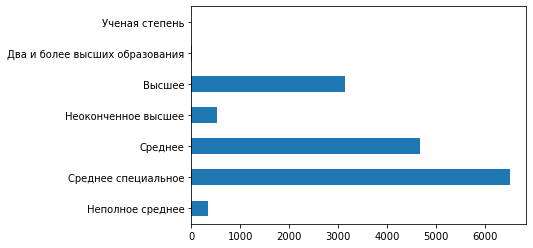

In [19]:
otp_clean['educationf'].value_counts(sort=False).plot(kind='barh')

## Профессия

### Задача 2.2
В каких отраслях промышленности работают клиенты банка?

In [20]:
# Ваш код здесь

## Сочетание двух факторов

При разведочном анализе интересны сочетания различных переменных, т.к. подобные визуализации могут раскрывать интересные зависимости, которые затем можно использовать при моделировании.

Изучим, как связаны уровень образования и пол. Обе переменные - дискретные, необходимо применить столбиковую диаграмму.


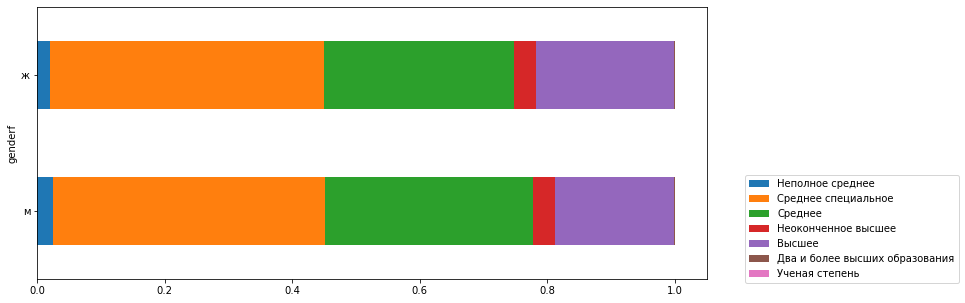

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))

(pd.crosstab(index=otp_clean['genderf'], columns=otp_clean['educationf'], normalize='index')
 .plot(kind='barh', stacked=True, ax=ax));

plt.legend(bbox_to_anchor=(1.05, 0.4));

### Задача 2.3
Сравните распределения возраста клиентов в зависимости от пола. Учтите, что возраст - это количественная переменная

In [22]:
# Ваш код здесь

## Связь дискретной и непрерывной переменной

Если наблюдений мало, то сравнение распределений непрерывной переменной с помощью гистограмм и даже ящичных диаграмм может быть затруднено. В этой ситуации можно сравнивать числовые характеристики распределений для групп.

<AxesSubplot:ylabel='educationf'>

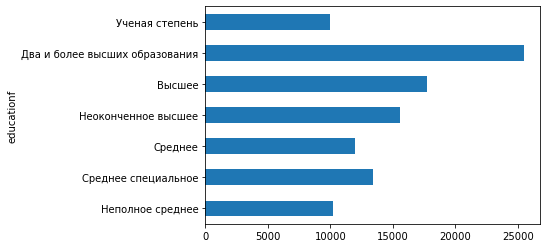

In [23]:
otp_clean.groupby('educationf')['personal_income'].mean().plot(kind='barh')

<AxesSubplot:ylabel='educationf'>

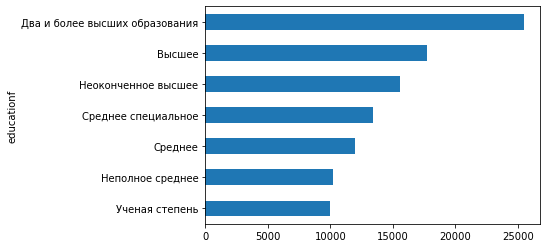

In [24]:
otp_clean.groupby('educationf')['personal_income'].mean().sort_values().plot(kind='barh')

Странно, что человек с ученой степенью оказался самым бедным. Возможно, дело в том, что таких людей в выборке мало и результат - случайное совпадение

In [25]:
otp_clean['educationf'].value_counts()

Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: educationf, dtype: int64

### Задача 2.4
Изучите, как изменяется доход клиентов в зависимости от профессии

In [26]:
# Ваш код здесь


# 3. Исследование влияние различных факторов на целевую переменную

Используя визуализацию, изучите влияние следующих факторов на целевую переменную:

- возраст  
- социальный статус (работа, пенсия)  
- пол  
- количество детей (нет, 1 ребенок, более одного ребенка)  
- уровень образования  
- семейный статус  
- персональный доход  
- регион  
- наличие автомобиля  
- наличие кредита  
- наличие просроченных платежей по кредитам  
- стаж работы

Рассмотрите как минимум по одному примеру связи между тремя переменными, одна из которых - целевая, а другие:

- обе - количественные,  
- обе - категориальные,
- одна - количественная, а другая - категориальная.

Попробуйте несколько способов визуализации таких зависимостей и выберите из них наиболее наглядный.

Выбрать правильную визуализацию вам помогут ресурсы:
* https://www.data-to-viz.com/  
* https://datavizcatalogue.com/RU/
* https://datayoga.ru/vizcards#catalogue
* https://datavizproject.com/  


На основе результатов вашего анализа напишите вывод о том, среди каких клиентов банку следует искать потенциальных покупателей новой услуги.